In [2]:
import os
import pandas as pd

In [3]:
arg = "twitter-search"
os.system(f'snscrape --jsonl --progress --max-results 200 {arg} "yoga exercise until:2022-11-22" > text-query-tweets.json')

Scraping, 100 results so far
Scraping, 200 results so far
Stopped scraping after 200 results due to --max-results


0

In [4]:
tweets_df = pd.read_json('text-query-tweets.json', lines=True)

In [5]:
tweets_df.head()

,_type,url,date,rawContent,renderedContent,id,user,replyCount,retweetCount,likeCount,...,retweetedTweet,quotedTweet,inReplyToTweetId,inReplyToUser,mentionedUsers,coordinates,place,hashtags,cashtags,card
0,snscrape.modules.twitter.Tweet,https://twitter.com/schimmel74jtpdy/status/159...,2022-11-21 23:44:59+00:00,"Extra Thick Yoga Ball Exercise Ball (22in,26in...","Extra Thick Yoga Ball Exercise Ball (22in,26in...",1594839319591755777,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,None,NaN,None,None,None,None,None,NaN,None
1,snscrape.modules.twitter.Tweet,https://twitter.com/FromRvaToLA/status/1594837...,2022-11-21 23:39:14+00:00,I did yoga today for the first time in months ...,I did yoga today for the first time in months ...,1594837875291553792,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,0,6,...,NaN,None,NaN,None,None,None,None,None,NaN,None
2,snscrape.modules.twitter.Tweet,https://twitter.com/tanner27r/status/159483572...,2022-11-21 23:30:42+00:00,Giantex 6'x2'x2'' Tri-Fold Gymnastics Mat with...,Giantex 6'x2'x2'' Tri-Fold Gymnastics Mat with...,1594835725790613505,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,None,NaN,None,None,None,None,None,NaN,None
3,snscrape.modules.twitter.Tweet,https://twitter.com/Hitesh93Paliwal/status/159...,2022-11-21 23:29:29+00:00,@musing_monica Do yoga rather than exercise fo...,@musing_monica Do yoga rather than exercise fo...,1594835419950354439,"{'_type': 'snscrape.modules.twitter.User', 'us...",0,0,0,...,NaN,None,1.594556e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...","[{'_type': 'snscrape.modules.twitter.User', 'u...",None,None,None,NaN,None
4,snscrape.modules.twitter.Tweet,https://twitter.com/wellnesscall/status/159482...,2022-11-21 22:57:01+00:00,Next up is crunches on a yoga ball.\n\nThis ex...,Next up is crunches on a yoga ball.\n\nThis ex...,1594827249139818509,"{'_type': 'snscrape.modules.twitter.User', 'us...",1,0,0,...,NaN,None,1.594826e+18,"{'_type': 'snscrape.modules.twitter.User', 'us...",None,None,None,None,NaN,None


In [6]:
df = tweets_df[["renderedContent"]]
df.head()

,renderedContent
0,"Extra Thick Yoga Ball Exercise Ball (22in,26in..."
1,I did yoga today for the first time in months ...
2,Giantex 6'x2'x2'' Tri-Fold Gymnastics Mat with...
3,@musing_monica Do yoga rather than exercise fo...
4,Next up is crunches on a yoga ball.\n\nThis ex...


In [15]:
df = df.rename(columns = {"renderedContent":"tweets"})

In [8]:
import re
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

[nltk_data] Downloading package punkt to /Users/haran/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /Users/haran/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
stop_words = stopwords.words('english')
print(stop_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [10]:
def tweetCleaning(tweet):
    clean_tweet = re.sub(r"@[a-zA-Z0-9]+","",tweet) # removes mentions
    clean_tweet = re.sub(r"#[a-zA-Z0-9]+\s","",clean_tweet) # removes hashtags and blank spaces
    clean_tweet = ' '.join(word for word in clean_tweet.split() if word not in stop_words) # removing all the stopwords from the tweet
    return clean_tweet

In [16]:
df['cleaned_tweets'] = df['tweets'].apply(tweetCleaning)
df.head()

,tweets,cleaned_tweets
0,"Extra Thick Yoga Ball Exercise Ball (22in,26in...","Extra Thick Yoga Ball Exercise Ball (22in,26in..."
1,I did yoga today for the first time in months ...,"I yoga today first time months wow, maybe stre..."
2,Giantex 6'x2'x2'' Tri-Fold Gymnastics Mat with...,Giantex 6'x2'x2'' Tri-Fold Gymnastics Mat Carr...
3,@musing_monica Do yoga rather than exercise fo...,_monica Do yoga rather exercise physical mental.
4,Next up is crunches on a yoga ball.\n\nThis ex...,Next crunches yoga ball. This exercise ideal s...


In [17]:
from textblob import TextBlob
from wordcloud import WordCloud

In [18]:
def calcPolarity(tweet):
    return TextBlob(tweet).sentiment.polarity

def calcSubjectivity(tweet):
    return TextBlob(tweet).sentiment.subjectivity

def segmentation(polarity):
    if polarity > 0:
        return "positive"
    elif polarity == 0:
        return "neutral"
    else:
        return "negative"

In [19]:
df['polarity'] = df['cleaned_tweets'].apply(calcPolarity)
df['subjectivity'] = df['cleaned_tweets'].apply(calcSubjectivity)
df['segmentation'] = df['polarity'].apply(segmentation)
df.head()

,tweets,cleaned_tweets,polarity,subjectivity,segmentation
0,"Extra Thick Yoga Ball Exercise Ball (22in,26in...","Extra Thick Yoga Ball Exercise Ball (22in,26in...",-0.200000,0.350000,negative
1,I did yoga today for the first time in months ...,"I yoga today first time months wow, maybe stre...",0.212500,0.458333,positive
2,Giantex 6'x2'x2'' Tri-Fold Gymnastics Mat with...,Giantex 6'x2'x2'' Tri-Fold Gymnastics Mat Carr...,0.000000,0.000000,neutral
3,@musing_monica Do yoga rather than exercise fo...,_monica Do yoga rather exercise physical mental.,-0.050000,0.171429,negative
4,Next up is crunches on a yoga ball.\n\nThis ex...,Next crunches yoga ball. This exercise ideal s...,0.216667,0.514815,positive


In [20]:
df['segmentation'].value_counts(ascending=True)

negative    29
neutral     82
positive    89
Name: segmentation, dtype: int64

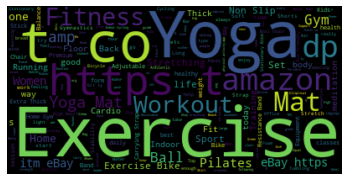

In [21]:
import matplotlib.pyplot as plt

consolidated = ' '.join(word for word in df['cleaned_tweets'])

word_cloud = WordCloud(width=400,height=200,random_state = 20, max_font_size = 120).generate(consolidated)

plt.imshow(word_cloud,interpolation='bilinear')
plt.axis('off')
plt.show()